In [1]:
import numpy as np
import pandas as pd
 
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
dataset_path_w = 'winequality-white.csv'
dataset_path_r = 'winequality-red.csv'

In [3]:
data_w = pd.read_csv(dataset_path_w, sep=';')
data_r = pd.read_csv(dataset_path_r, sep=';')

In [4]:
data_w.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7
4897,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6


In [5]:
data_r.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
data_wr= data_w.append(data_r,ignore_index=True)
col_names = data_wr.columns
col_names

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [7]:
data_r.shape,data_w.shape,len(data_wr)

((1599, 12), (4898, 12), 6497)

In [8]:
is_white = [1 for i in range(len(data_w))]+[0 for i in range(len(data_r))]
data_wr['is_white']=is_white

In [9]:
data_wr[len(data_w)-2:len(data_w)+2]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,is_white
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,1
4897,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6,1
4898,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
4899,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0


In [10]:
def is_hq(x):
    return 1 if x>=7 else 0
data_wr['quality']=data_wr['quality'].apply(is_hq)

Subset the data based on wine quality and find respective mean.
Check for pattern
Volatile.acidity, citric.acid, chlorides are showing some pattern and Alcohol being the best

In [11]:
data_wr.groupby(by='quality').mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,is_white
quality,,,,,,,,,,,,
0,7.247011,0.352019,0.314720,5.593812,0.058837,30.395690,117.176533,0.995105,3.216262,0.528768,10.261462,0.735249
1,7.085709,0.289170,0.334628,4.827721,0.044576,31.055208,109.891151,0.993027,3.227651,0.541488,11.433359,0.830070


In [12]:
data_wr.groupby(by='is_white').mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
is_white,,,,,,,,,,,,
0,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,0.135710
1,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,0.216415


In [13]:
data_wr.corr()[['quality','is_white']]

,quality,is_white
fixed acidity,-0.049447,-0.486740
volatile acidity,-0.151714,-0.653036
citric acid,0.054444,0.187397
residual sugar,-0.063992,0.348821
chlorides,-0.161781,-0.512678
free sulfur dioxide,0.014767,0.471644
total sulfur dioxide,-0.051226,0.700357
density,-0.275441,-0.390645
pH,0.028149,-0.329129
sulphates,0.033971,-0.487218


In [14]:
scaler = preprocessing.StandardScaler()
x_scaled = scaler.fit_transform(data_wr[col_names[:-2]])
X = pd.DataFrame(x_scaled)


In [15]:
yq= data_wr['quality']
Xq_train, Xq_test, yq_train, yq_test = train_test_split(X, yq, 
                                                    test_size=0.2, 
                                                    random_state=123, 
                                                    stratify=yq)

In [16]:
yc= data_wr['is_white']
Xc_train, Xc_test, yc_train, yc_test = train_test_split(X, yc, 
                                                    test_size=0.2, 
                                                    random_state=123, 
                                                    stratify=yc)

In [17]:
logmodel_q = LogisticRegression()
logmodel_q.fit(Xq_train,yq_train)
predictions_q = logmodel_q.predict(Xq_test)

In [18]:
logmodel_c = LogisticRegression()
logmodel_c.fit(Xc_train,yc_train)
predictions_c = logmodel_c.predict(Xc_test)

In [19]:
print('wine quality classification report \n \n',classification_report(yq_test,predictions_q))
print('wine colour classification report \n \n',classification_report(yc_test,predictions_c))

wine quality classification report 
 
              precision    recall  f1-score   support

          0       0.83      0.96      0.89      1044
          1       0.55      0.22      0.32       256

avg / total       0.78      0.81      0.78      1300

wine colour classification report 
 
              precision    recall  f1-score   support

          0       0.99      0.98      0.99       320
          1       0.99      1.00      1.00       980

avg / total       0.99      0.99      0.99      1300



In [20]:
error_rate = []
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(Xc_train,yc_train)
    pred_i = knn.predict(Xc_test)
    error_rate.append(np.mean(pred_i != yc_test))

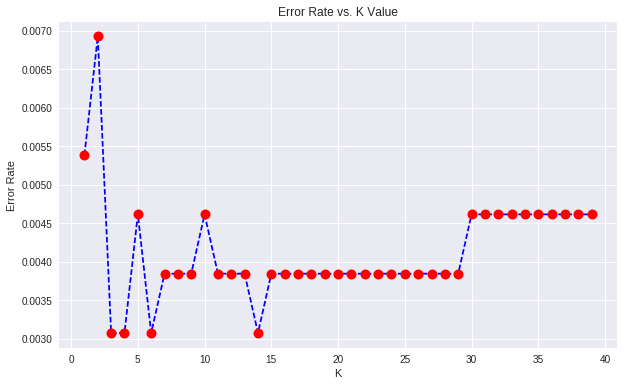

In [21]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [34]:
n = error_rate.index(min(error_rate))
n

2

In [35]:
knn = KNeighborsClassifier(n_neighbors=n)

In [24]:
knn.fit(Xc_train,yc_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

In [25]:
pred = knn.predict(Xc_test)

In [26]:
print('there are '+str(n)+' wine types \n \n',classification_report(yc_test,predictions_c))

there are 2 wine types 
 
              precision    recall  f1-score   support

          0       0.99      0.98      0.99       320
          1       0.99      1.00      1.00       980

avg / total       0.99      0.99      0.99      1300



In [27]:
"ThankYou"

'ThankYou'